/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


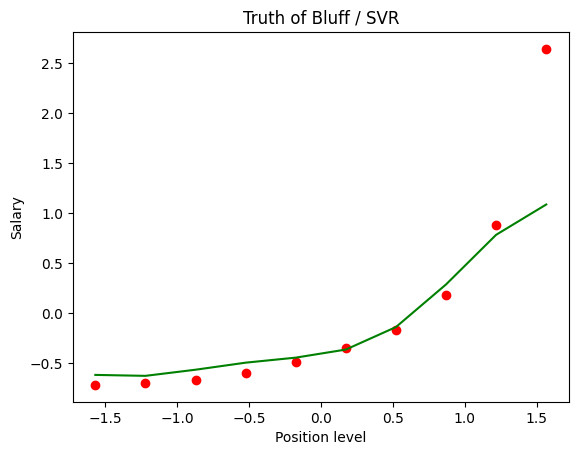

In [18]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import and split the data and classes
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:, 1:-1].values
Y = dataset.iloc[:, 2].values


# features scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_Y.fit_transform(np.reshape(Y, (10,1)))

# Fitting Regression modelto the dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf') # add this parametre kernel='rbf'
regressor.fit(X,Y)

# Assume regressor.predict() returns a 1D array. We reshape it to 2D using .reshape(-1, 1)
y_pred_2d = regressor.predict(sc_X.transform(np.array([[8.5]]))).reshape(-1, 1)

# Now y_pred_2d is in the correct shape for sc_Y.inverse_transform()
y_pred = sc_Y.inverse_transform(y_pred_2d)


# Visualisation the regression result
plt.scatter(x=X, y=Y,color='red')
plt.plot(X, regressor.predict(X), color='green')
plt.title('Truth of Bluff / SVR')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()